In [2]:
import pandas as pd
df= pd.read_csv('data/ventas2020-2022.csv',sep=';', on_bad_lines='skip')
df

,PRODUCTO,OPERACIÓN,CODIGO TOMADOR,NOMBRE TOMADOR,CODIGO DE PRODUCTOR,FECHA DE EMISION,FECHA INICIO VIGENCIA,FECHA FIN VIG,DURACION DE POLIZA,PRODUCTO ANTERIOR,...,MEDIO DE PAGO,PREMIO,CANTIDAD DE ASEGURADOS,TIPO DE PERSONA,FECHA NACIMIENTO,SEXO,TIPO DOC,NRO DOC,DOMICILIO,TELEFONO
0,1,17,41,SMSV INSTITUCION MUTUALISTA | 2030527516737,1,30/6/2020,1/7/2020,30/6/2021,12,1,...,8,"38823434,13",1,J,1000-01-01,1,20.0,3.052752e+10,AV CORDOBA 1674 0 - (1055) CAPITAL FEDERAL - ...,1141294000
1,1,18,41,SMSV INSTITUCION MUTUALISTA | 2030527516737,1,30/6/2021,1/7/2021,30/6/2022,12,1,...,8,"70912609,69",1,J,1000-01-01,1,20.0,3.052752e+10,AV CORDOBA 1674 0 - (1055) CAPITAL FEDERAL - ...,1141294000
2,1,19,41,SMSV INSTITUCION MUTUALISTA | 2030527516737,1,30/6/2022,1/7/2022,30/6/2023,12,1,...,8,"74884627,51",1,J,1000-01-01,1,20.0,3.052752e+10,AV CORDOBA 1674 0 - (1055) CAPITAL FEDERAL - ...,1141294000
3,2,15,41,SMSV INSTITUCION MUTUALISTA | 2030527516737,1,30/6/2020,1/7/2020,30/6/2021,12,2,...,8,"129271025,4",1,J,1000-01-01,1,20.0,3.052752e+10,AV CORDOBA 1674 0 - (1055) CAPITAL FEDERAL - ...,1141294000
4,2,16,41,SMSV INSTITUCION MUTUALISTA | 2030527516737,1,30/6/2021,1/7/2021,30/6/2022,12,2,...,8,"277814711,3",1,J,1000-01-01,1,20.0,3.052752e+10,AV CORDOBA 1674 0 - (1055) CAPITAL FEDERAL - ...,1141294000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89139,304,21,236152,MARIPILLAN HUMBERTO | 424017722,354,24/7/2022,25/7/2022,24/7/2023,12,0,...,5,"6224,34",1,F,9/2/1975,1,21.0,2.024018e+10,SECCION QUINTAS S/N 0 - (6360) BARRIO EL MOL...,2977401653
89140,304,24,214399,JEREZ JUAN JOSE | 0427995460,350,13/9/2022,14/9/2022,13/9/2023,12,0,...,5,"6666,43",1,F,12/8/1980,1,4.0,2.799546e+07,CIUDAD DE NIEVA SUIPACHA 696 - (4600) - JUY...,3516114696
89141,304,33,307443,NIEVA ANTONIO RAFAEL | 2120307686970,350,28/9/2022,29/9/2022,28/9/2023,12,0,...,5,"6477,36",1,F,11/7/1984,1,21.0,2.030769e+10,BARRIO MILITAR ANEXO CASA 30 - (4600) SAN SA...,3875748168
89142,304,35,139212,DOMINGUEZ NELSON RAFAEL | 0427727276,354,17/11/2022,18/11/2022,17/11/2023,12,0,...,5,"23834,08",2,F,5/3/1980,1,21.0,2.027727e+10,AV CORDOBA 1674 0 - (4411) SEY - JUY - ARG,3884208847


/tmp/ipykernel_24154/2042755494.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['FECHA DE EMISION'] = pd.to_datetime(df['FECHA DE EMISION'])


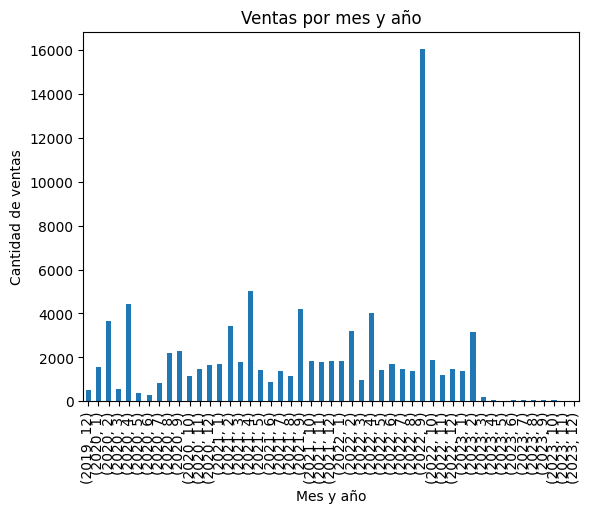

In [5]:
import matplotlib.pyplot as plt
# Convertir la columna de fecha a un objeto de fecha y tiempo
df['FECHA DE EMISION'] = pd.to_datetime(df['FECHA DE EMISION'])

# Agrupar los datos por mes y año y contar las ventas en cada grupo
ventas_por_mes = df.groupby([df['FECHA DE EMISION'].dt.year, df['FECHA DE EMISION'].dt.month]).size()

# Crear un objeto de figura y un objeto de eje en Matplotlib
fig, ax = plt.subplots()

# Dibujar un gráfico de barras en el objeto de eje
ventas_por_mes.plot(kind='bar', ax=ax)

# Configurar los ejes y etiquetas del gráfico
ax.set_xlabel('Mes y año')
ax.set_ylabel('Cantidad de ventas')
ax.set_title('Ventas por mes y año')

# Mostrar el gráfico
plt.show()

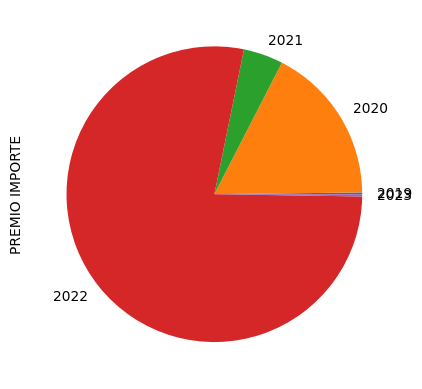

In [7]:
df['PREMIO IMPORTE'] = pd.to_numeric(df['PREMIO'], errors='coerce')
# Agrupar los datos por año y sumar los importes de ventas en cada grupo
ventas_por_anio = df.groupby(df['FECHA DE EMISION'].dt.year)['PREMIO IMPORTE'].sum()

# Crear un objeto de figura y un objeto de eje en Matplotlib
fig, ax = plt.subplots()

# Dibujar un gráfico de torta en el objeto de eje
ventas_por_anio.plot(kind='pie', ax=ax)

# Configurar los ejes y etiquetas del gráfico
ax.set_ylabel('')

# Mostrar el gráfico
plt.show()